In [57]:
import sklearn


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
import pandas as pd


In [59]:
samples= pd.read_csv('dataset/2.DatasetLabeling_NomorUrut_clean_content_textblobvader.csv', encoding='UTF-8')
# samples=samples[['likes','replies','quotes','retweets','searchQuery','clean_content']]
samples.shape

(7306, 20)

In [4]:
print("Jumlah Konten unik:",int(len(samples['clean_content'].unique())))
# samples['clean_content'].unique()

Jumlah Konten unik: 3307


In [5]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   text                           7306 non-null   object 
 1   clean_content                  7306 non-null   object 
 2   likes                          7306 non-null   int64  
 3   replies                        7306 non-null   int64  
 4   quotes                         7306 non-null   int64  
 5   retweets                       7306 non-null   int64  
 6   searchQuery                    7306 non-null   object 
 7   user_location                  3472 non-null   object 
 8   tanggal                        7306 non-null   object 
 9   dataset                        7306 non-null   object 
 10  date                           7306 non-null   object 
 11  textblob_sentiment             7306 non-null   object 
 12  textblob_sentiment_assessment  7306 non-null   o

In [6]:
samples.drop_duplicates(subset=['clean_content'], inplace=True)
# print(samples)

In [118]:
len(samples)

7306

In [7]:
# print("Jumlah Konten unik:",int(len(samples['clean_content'])))
samples.shape

(3307, 20)

In [8]:
# len(samples['clean_content'].unique())
print("Jumlah Query unik:",int(len(samples['searchQuery'].unique())))
samples['searchQuery'].unique()

Jumlah Query unik: 28


array(['#nomor', '#KIM', '#gibran', '#prabowo', '#indonesiamaju',
       'paslon', 'nomor urut', '#koalisiindonesiamaju', '#prabowo2024',
       '#prabowogibran', '#aniesmuhaimin', '#aniespresiden',
       '#aniesbaswedan', '#anies2024', '#muhaimin', '#AMIN',
       '#aniescakimin', '#anies', '#koalisiperubahan', '#cakimin',
       '#ganjarpresiden', '#ganjar', '#ganjarpranowo', '#GAMA',
       '#ganjar2024', '#mahfud', '#ganjarmahfud', '#mahfudmd'],
      dtype=object)

## Define Date Timestamp

In [9]:
from datetime import datetime
import pytz


now = datetime.now() # current date and time

tz = pytz.timezone('Asia/Jakarta')
aware_obj = tz.localize(now)
d = aware_obj.strftime("%d%m%Y")
print(d,now,aware_obj.tzinfo)

23112023 2023-11-23 20:17:46.855489 Asia/Jakarta


## Setup Data Sampling

In [120]:
totaldata=str(len(samples))

In [60]:
print(samples['dataset'].value_counts().reindex(['prabowogibran','aniesmuhaimin','ganjarmahfud'], fill_value=0))

dataset
prabowogibran    1826
aniesmuhaimin    3045
ganjarmahfud     2435
Name: count, dtype: int64


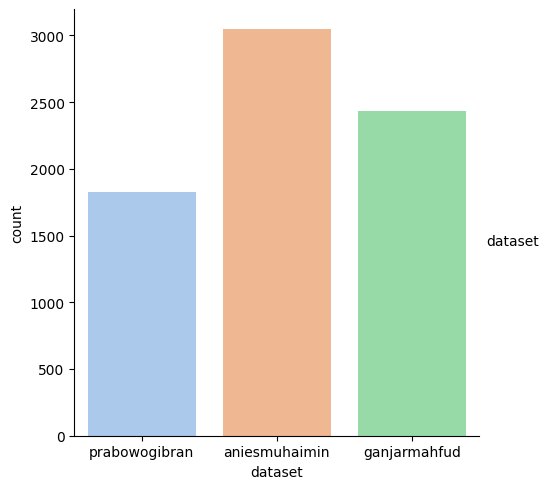

In [121]:
import seaborn as sns
sns.catplot(data=samples, x="dataset", kind="count",hue="dataset",palette="pastel")
plt.savefig('hasil/5.statistik_dataset_'+totaldata+'.png')

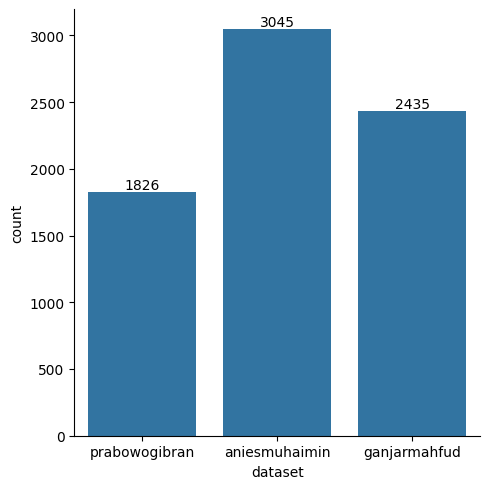

In [122]:
grid = sns.catplot(x='dataset', kind='count', data=samples)
ax = grid.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.savefig('hasil/5.statistik_dataset2_'+totaldata+'.png')

In [63]:
# dataset1=samples.query("dataset=='prabowogibran' and vader_sentiment=='Negative'").sample(10)
dataset1=samples.query("dataset=='prabowogibran'")#.sample(10)
dataset2=samples.query("dataset=='aniesmuhaimin'")#.sample(10)
dataset3=samples.query("dataset=='ganjarmahfud'")#.sample(10)

In [14]:
dataset1.head()

,text,clean_content,likes,replies,quotes,retweets,searchQuery,user_location,tanggal,dataset,date,textblob_sentiment,textblob_sentiment_assessment,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos,vader_sentiment
0,"Sah, Pasangan Prabowo-Gibran dapat Nomor Urut ...",sah pasang prabowo gibran nomor urut tetap kpu...,0,0,0,0,#nomor,NaN,11/14/2023,prabowogibran,2023-11-14,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
1,#nomor 1 Amin menang,nomor amin menang,0,0,0,0,#nomor,NaN,11/15/2023,prabowogibran,2023-11-15,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
2,Pak Prabowo mengangkat anak penerbang tucano y...,prabowo angkat anak terbang tucano gugur anak ...,0,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
3,"Unboxing Prabowo; Cerita sejarah, deklarasi bu...",unboxing prabowo cerita sejarah deklarasi budi...,1,0,0,0,#KIM,NaN,11/20/2023,prabowogibran,2023-11-20,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral
4,#Nomor 1\n\nIndonesia beradab,nomor indonesia adab,0,0,0,0,#nomor,NaN,11/14/2023,prabowogibran,2023-11-14,Neutral,"Sentiment(polarity=0.0, subjectivity=0.0, asse...",0.0,0.0,0.0,0.0,1.0,0.0,Neutral


In [15]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1528 entries, 0 to 1825
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   text                           1528 non-null   object 
 1   clean_content                  1528 non-null   object 
 2   likes                          1528 non-null   int64  
 3   replies                        1528 non-null   int64  
 4   quotes                         1528 non-null   int64  
 5   retweets                       1528 non-null   int64  
 6   searchQuery                    1528 non-null   object 
 7   user_location                  752 non-null    object 
 8   tanggal                        1528 non-null   object 
 9   dataset                        1528 non-null   object 
 10  date                           1528 non-null   object 
 11  textblob_sentiment             1528 non-null   object 
 12  textblob_sentiment_assessment  1528 non-null   object

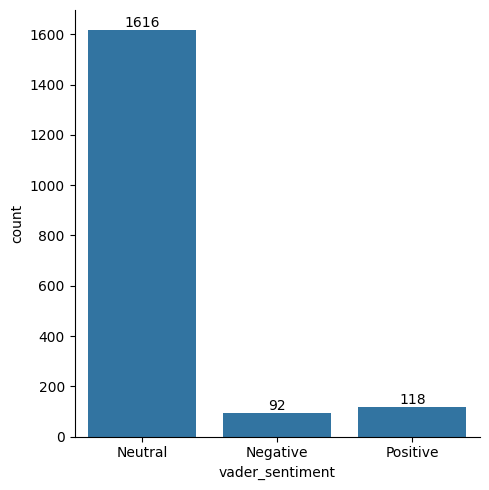

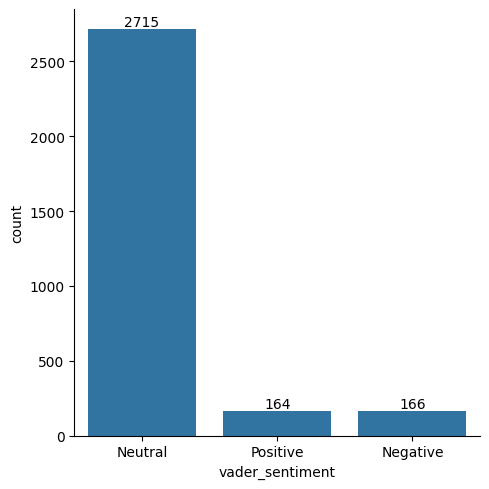

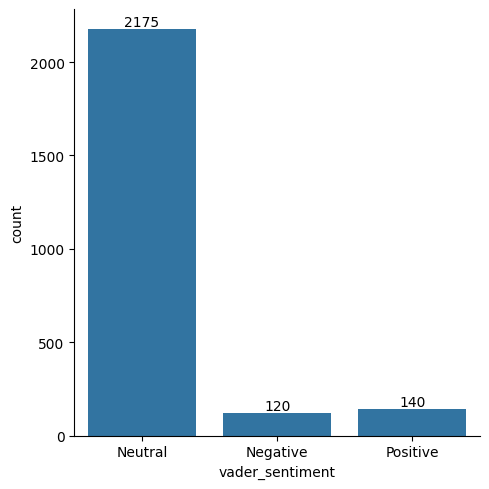

In [123]:
# grid = sns.catplot(x='vader_sentiment', kind='count', data=dataset1)
prabowo1=sns.catplot(data=dataset1, x="vader_sentiment", kind="count")#,hue="vader_sentiment",palette="pastel")
ax = prabowo1.axes[0, 0]
ax.bar_label(ax.containers[0])
plt.savefig('hasil/5.statistik_dataset_'+totaldata+'_prabowo_'+str(len(dataset1))+'.png')

anies1=sns.catplot(data=dataset2, x="vader_sentiment", kind="count")#,hue="vader_sentiment",palette="pastel")
ax1 = anies1.axes[0, 0]
ax1.bar_label(ax1.containers[0])
plt.savefig('hasil/5.statistik_dataset_'+totaldata+'_anies_'+str(len(dataset2))+'.png')

ganjar1=sns.catplot(data=dataset3, x="vader_sentiment", kind="count")#,hue="vader_sentiment",palette="pastel")
ax2 = ganjar1.axes[0, 0]
ax2.bar_label(ax2.containers[0])
plt.savefig('hasil/5.statistik_dataset_'+totaldata+'_ganjar_'+str(len(dataset3))+'.png')

## Balanced Sampling

In [17]:
#get sampling data random
# jsampling=25  
# sample=samples.sample(n=jsampling,replace=True,random_state=42)
#get sampling random 50% of data random 
# df = df.sample(n=3,replace=True,frac=0.5,random_state=42)

In [130]:
# column = 'vader_sentiment'
jsampling=1500
# datax1=samples[['dataset','vader_sentiment','clean_content']]
# balanceddf = samples.groupby(column).sample(n=samples[column].value_counts().min(), random_state=42)
# balanceddf = samples.groupby(['dataset','vader_sentiment']).sample(n=jsampling,replace=True, random_state=42)
balanceddf = samples.groupby(['dataset']).sample(n=jsampling,replace=True, random_state=42)

In [19]:
# balanceddf.head(10)

In [20]:
# balanced_df=samples.groupby('vader_sentiment',as_index = False,group_keys=False).apply(lambda s: s.sample(3,replace=True))

In [21]:
# balanceddf.head(10)

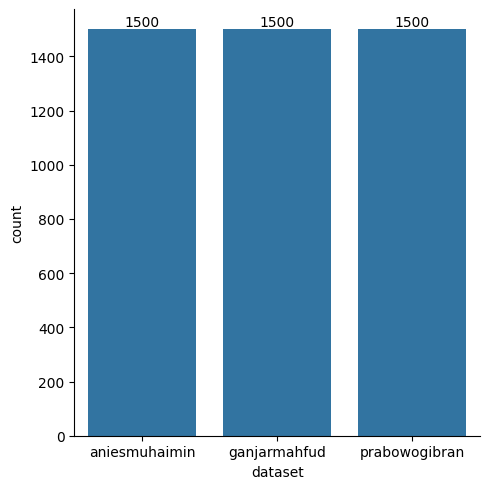

In [131]:
balanced=sns.catplot(data=balanceddf, x="dataset", kind="count")#,hue="vader_sentiment",palette="pastel")
axx = balanced.axes[0, 0]
axx.bar_label(axx.containers[0])
plt.savefig('hasil/5.statistik_dataset_sampling_'+str(jsampling)+'_balanced.png')

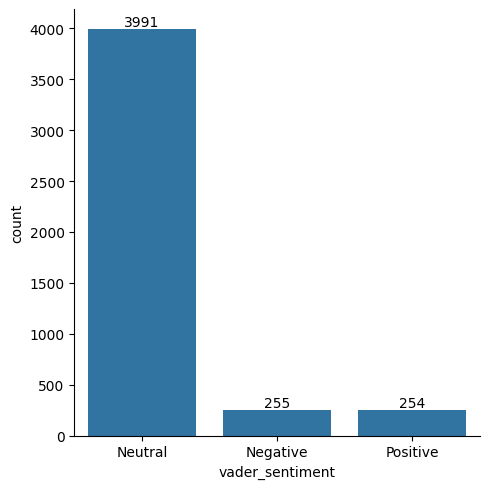

In [132]:
balanced1=sns.catplot(data=balanceddf, x="vader_sentiment", kind="count")#,hue="vader_sentiment",palette="pastel")
axx = balanced1.axes[0, 0]
axx.bar_label(axx.containers[0])
plt.savefig('hasil/5.statistik_dataset_sampling_'+str(jsampling)+'_sentiment_imbalanced.png')

In [133]:
print(balanceddf['dataset'].value_counts().reindex(['prabowogibran','aniesmuhaimin','ganjarmahfud'], fill_value=0))
print(balanceddf['vader_sentiment'].value_counts().reindex(['Positive','Neutral','Negative'], fill_value=0))

dataset
prabowogibran    1500
aniesmuhaimin    1500
ganjarmahfud     1500
Name: count, dtype: int64
vader_sentiment
Positive     254
Neutral     3991
Negative     255
Name: count, dtype: int64


In [136]:
import numpy as np
# Code Snippet for Character Length Histogram
def plot_character_length_histogram(text):
    text.str.len().\
        hist()

# Code Snippet for Word Number Histogram
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

# Code Snippet for Word Length Histogram
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x: [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

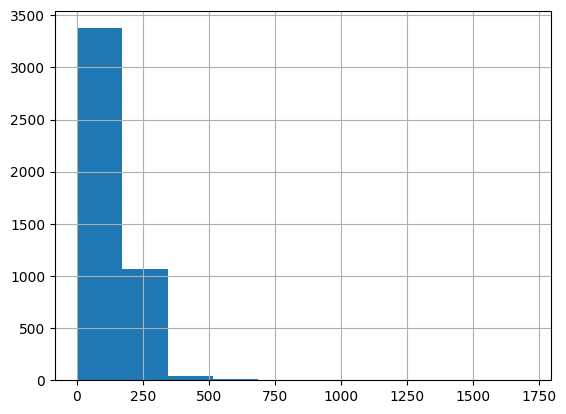

In [138]:
# plot_character_length_histogram(sample['clean_content'])
plot_character_length_histogram(balanceddf['clean_content'])
plt.savefig('hasil/5.statistik_dataset_'+str(jsampling)+'_balanced_character_length_histogram.png')

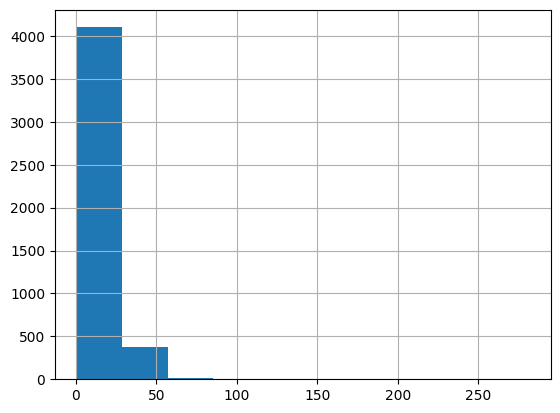

In [139]:
# plot_word_number_histogram(sample['clean_content'])
plot_word_number_histogram(balanceddf['clean_content'])
plt.savefig('hasil/5.statistik_dataset_'+str(jsampling)+'_balanced_word_number_histogram.png')

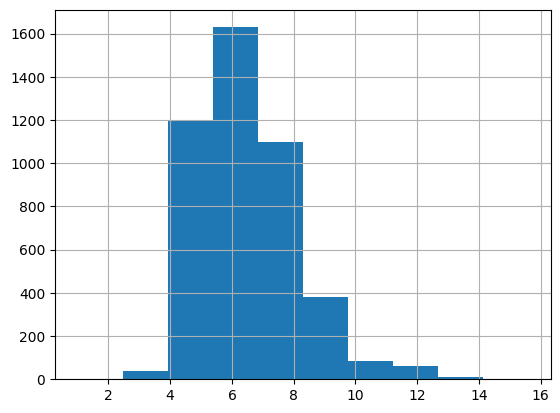

In [140]:
# plot_word_length_histogram(sample['clean_content'])
plot_word_length_histogram(balanceddf['clean_content'])
plt.savefig('hasil/5.statistik_dataset_'+str(jsampling)+'_balanced_word_length_histogram.png')

## Split Dataset

In [29]:
# sample.head()

In [141]:
# dataset=sample
dataset=balanceddf
X = dataset['clean_content']     # Define feature matriX
y = dataset['vader_sentiment']         # Define target feature matriX
target_label=['Positive','Neutral','Negative']
jumlahdatauji=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=jumlahdatauji, random_state=42, stratify=y)

datalatih=('Dataset shopee {}:{} \n [INFO] Sebaran kelas pada training  set: \n Negative: \t {} \n Neutral: \t{} \n Positive:\t{} \n'.format((1-jumlahdatauji)*100,jumlahdatauji*100,sum(y_train=='Negative'), sum(y_train=='Neutral'), sum(y_train=='Positive')))
datauji=('[INFO] Sebaran kelas pada testing set:\n Negative: \t{}\n Neutral: \t{}\n Positive:\t{} \n'.format(sum(y_test=='Negative'), sum(y_test=='Neutral'), sum(y_test=='Positive')))

dimensi_data=('[INFO] Shape Data: \n X_train: \t {} \n X_test: \t {} \n y_train: \t {} \n y_test: \t {} \n'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

with open('hasil/datauji-pilpres2024_sample_'+str(jsampling)+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(datalatih))
    f.writelines(''.join(datauji))
    f.writelines(''.join(dimensi_data))

print(datalatih, datauji, dimensi_data)
dtuji=int(jumlahdatauji*100)
dtlatih=(100-(dtuji))

Dataset shopee 75.0:25.0 
 [INFO] Sebaran kelas pada training  set: 
 Negative: 	 191 
 Neutral: 	2993 
 Positive:	191 
 [INFO] Sebaran kelas pada testing set:
 Negative: 	64
 Neutral: 	998
 Positive:	63 
 [INFO] Shape Data: 
 X_train: 	 (3375,) 
 X_test: 	 (1125,) 
 y_train: 	 (3375,) 
 y_test: 	 (1125,) 



## Save Splitted Dataset

In [142]:
# print(dataset)

In [143]:
# dataset.to_csv( "hasil/5_dataset__"+d+".csv", index=False, encoding='utf-8-sig')
X_train.to_csv( "hasil/5_train_data_"+str(jsampling)+"_"+str(dtlatih)+"_"+d+".csv", index=False, encoding='utf-8-sig')
X_test.to_csv( "hasil/5_test_data_"+str(jsampling)+"_"+str(dtuji)+"_"+d+".csv", index=False, encoding='utf-8-sig')

# Term Weighting TFIDF X Training and Y Testing

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer

In [145]:
# ngram_range = (1,2) #bigram
ngram_range = (1,3) #trigram

min_df = 5

tfidf = TfidfVectorizer(ngram_range=ngram_range, min_df=min_df)
# tfidf = TfidfVectorizer(max_features=1000)
# vectors = tfidf.fit_transform(dataset.clean_content).toarray()
# vectors = tfidf.fit_transform(X_train).toarray()
# words_df = pd.DataFrame(vectors, columns=tfidf.get_feature_names_out())
# words_df.head(10)


In [146]:

X_train = tfidf.fit_transform(X_train).toarray()
print(X_train)
columns=tfidf.get_feature_names_out()
# print(columns)
x_train_df = pd.DataFrame(X_train, columns=tfidf.get_feature_names_out())
x_train_df.head(10)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,aamiin,abang,acara,acara apdesi,acara deklarasi,acara deklarasi dukung,acara deklarasi tim,acara desa,acara desa satu,acara konsolidasi,...,yuk,zaman,zaman ini,zaman ini sahabatganjar,zaman sekarang,zaman sekarang rangkai,zona,zona ekspansif,zona ekspansif indonesiamaju,zsna
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
n_samples, n_features = X_train.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 3375
Number of features: 4906


In [148]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [149]:
x_train_df.to_csv( "hasil/xtrain_tfidf_trigram_"+str(jsampling)+"_"+str(dtlatih)+"_"+str(d)+".csv", index=False, encoding='utf-8-sig')

## TFIDF YTEST

In [150]:
X_test = tfidf.transform(X_test).toarray()
print(X_test)
columnstest=tfidf.get_feature_names_out()
# print(columnstest)
x_test_df = pd.DataFrame(X_test, columns=tfidf.get_feature_names_out())
x_test_df.head(10)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.10854727 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


,aamiin,abang,acara,acara apdesi,acara deklarasi,acara deklarasi dukung,acara deklarasi tim,acara desa,acara desa satu,acara konsolidasi,...,yuk,zaman,zaman ini,zaman ini sahabatganjar,zaman sekarang,zaman sekarang rangkai,zona,zona ekspansif,zona ekspansif indonesiamaju,zsna
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
x_test_df.to_csv( "hasil/xtest_tfidf_trigram_"+str(jsampling)+"_"+str(dtuji)+"_"+str(d)+".csv", index=False, encoding='utf-8-sig')

In [152]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler(feature_range=(0, 1))
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [153]:
print(X_train)
X_train.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(3375, 4906)

## Training and Testing

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Models

In [155]:
C=1
# Create and train a random forest classifier
# forest = RandomForestClassifier()
# best recommeded 'gamma': 100.0, 'C': 0.01
models = [
          # ('k-NN', KNeighborsClassifier()),
          ('SVC linear kernel', SVC(kernel='linear',C=C,max_iter=10000)),
          ('SVC RBF kernel', SVC(kernel='rbf',gamma=1,C=C)), 
          ('SVC Polynomial (degree 3)', SVC(kernel='poly',degree=3,C=C)),
          # ('Naive Bayes', MultinomialNB()),
          # ('Decision Tree', DecisionTreeClassifier()),
          # ('Random Forest',RandomForestClassifier(n_estimators=50)),
          # ('Regresi Linier',LogisticRegression()),
        ]


In [156]:
for name, clf in models:
  clf.fit(X_train, y_train) #x_train merupakan fitur, y train merupakan label
  train_acc = accuracy_score(y_train, clf.predict(X_train))
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Training Menggunakan {}, akurasi pada training set: {} \n'.format(name, train_acc))
  with open('hasil/training_result_pilpres_sample_'+str(jsampling)+'_'+str(dtlatih)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

[INFO] Training Menggunakan SVC linear kernel, akurasi pada training set: 0.9982222222222222 

[INFO] Training Menggunakan SVC RBF kernel, akurasi pada training set: 0.9982222222222222 

[INFO] Training Menggunakan SVC Polynomial (degree 3), akurasi pada training set: 0.9294814814814815 



## Pipeline And Gridsearch CV

In [157]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from pprint import pprint
from time import time
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold


In [158]:
pipe = Pipeline([
    ('bag_of_words', TfidfVectorizer(ngram_range=ngram_range, min_df=min_df)),
    ('estimator', SVC(random_state=42))])

#create GridSearchCV object with set of possible parameters
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10,100]
kernel = ['linear','rbf','poly','sigmoid']
# kernel = ['rbf']
param_grid={
    'estimator__C': Cs,
    'estimator__gamma': gammas,
    'estimator__kernel': kernel
}

In [48]:
# %%time
# # scoring = {'AUCe': 'roc_auc', 'Accuracy': 'accuracy', 'prec':  'precision', 'rec': 'recall', 'f1s': 'f1','spec':make_scorer(recall_score,pos_label=0)}
# # scoring=['accuracy','recall_macro','precision_macro','f1_macro']
# grid = GridSearchCV(pipe, param_grid=param_grid,refit = True, verbose = 3,scoring='accuracy',n_jobs=-1)

# grid.fit(X_train, y_train)
# y_pred = grid.predict(X_test)

## Testing 

In [159]:
for name, clf in models:
  # clf_predict = 
  clf.predict(X_test) #x_test merupakan fitur, y_test merupakan label
  test_acc = accuracy_score(y_test, clf.predict(X_test)) #clf.predict adalah prediksi label dari fitur x_test
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, test_acc))
  # printed=('[INFO] testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, train_acc))
  with open('hasil/testing_result_pilpres_sample_'+str(jsampling)+'_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

[INFO] Testing Menggunakan SVC linear kernel, akurasi pada testing set: 0.9804444444444445 

[INFO] Testing Menggunakan SVC RBF kernel, akurasi pada testing set: 0.9715555555555555 

[INFO] Testing Menggunakan SVC Polynomial (degree 3), akurasi pada testing set: 0.9235555555555556 



## Cross Validation

In [101]:
# cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# k=[3,5,7,10,12,15]
k=[5,7,12]
for x in (k):
  for name, model in models:
    clf.fit(X_train, y_train)
    cv = KFold(n_splits=x, random_state=50, shuffle=True)
    cross_val_acc = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
    printed_dataset=('Dataset: {} \t'.format('mlbb'))
    printed=('[INFO] {}x Cross Validation Menggunakan {}, Cross-validation akurasi: {:5f} (+/- {:5f}) \n'.format(x,name, cross_val_acc.mean(), cross_val_acc.std() * 2))
    with open('hasil/training_result_pilpres2024_crossval_'+str(jsampling)+'_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
      f.writelines(''.join(printed_dataset))
      f.writelines(''.join(printed))
    
    print(printed)
    # f.writelines(''.join("\n"))

[INFO] 5x Cross Validation Menggunakan SVC linear kernel, Cross-validation akurasi: 0.606043 (+/- 0.144471) 

[INFO] 5x Cross Validation Menggunakan SVC RBF kernel, Cross-validation akurasi: 0.606043 (+/- 0.144471) 

[INFO] 5x Cross Validation Menggunakan SVC Polynomial (degree 3), Cross-validation akurasi: 0.606043 (+/- 0.144471) 

[INFO] 7x Cross Validation Menggunakan SVC linear kernel, Cross-validation akurasi: 0.660614 (+/- 0.143824) 

[INFO] 7x Cross Validation Menggunakan SVC RBF kernel, Cross-validation akurasi: 0.660614 (+/- 0.143824) 

[INFO] 7x Cross Validation Menggunakan SVC Polynomial (degree 3), Cross-validation akurasi: 0.660614 (+/- 0.143824) 

[INFO] 12x Cross Validation Menggunakan SVC linear kernel, Cross-validation akurasi: 0.662386 (+/- 0.122143) 

[INFO] 12x Cross Validation Menggunakan SVC RBF kernel, Cross-validation akurasi: 0.662386 (+/- 0.122143) 

[INFO] 12x Cross Validation Menggunakan SVC Polynomial (degree 3), Cross-validation akurasi: 0.662386 (+/- 0.12

## Confusion Matrix

In [102]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, precision_score,roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')
# from sklearn.metrics import plot_confusion_matrix


In [52]:

# for name, model in models:
#   predictions=model.predict(X_test)
#   cm = confusion_matrix(y_test, predictions, labels=model.classes_)
#   # plot_confusion_matrix(model,X_train, y_train) 
#   disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
#   disp.plot()
#   # plt.title('Confusion Matrix: {}'.format(name))
#   plt.show()

## Laporan Klasifikasi


In [104]:
import seaborn as sns

[INFO] Laporan klasifikasi

Menggunakan Metode :SVC linear kernel 

              precision    recall  f1-score   support

    Negative       1.00      0.88      0.93        64
     Neutral       0.98      1.00      0.99       998
    Positive       0.93      0.84      0.88        63

    accuracy                           0.98      1125
   macro avg       0.97      0.90      0.94      1125
weighted avg       0.98      0.98      0.98      1125

Accuracy score: 98.04%
Precision score: 98.03%
Recall score: 98.04% 

Menggunakan Metode :SVC RBF kernel 

              precision    recall  f1-score   support

    Negative       1.00      0.78      0.88        64
     Neutral       0.97      1.00      0.98       998
    Positive       1.00      0.71      0.83        63

    accuracy                           0.97      1125
   macro avg       0.99      0.83      0.90      1125
weighted avg       0.97      0.97      0.97      1125

Accuracy score: 97.16%
Precision score: 97.24%
Recall score: 97

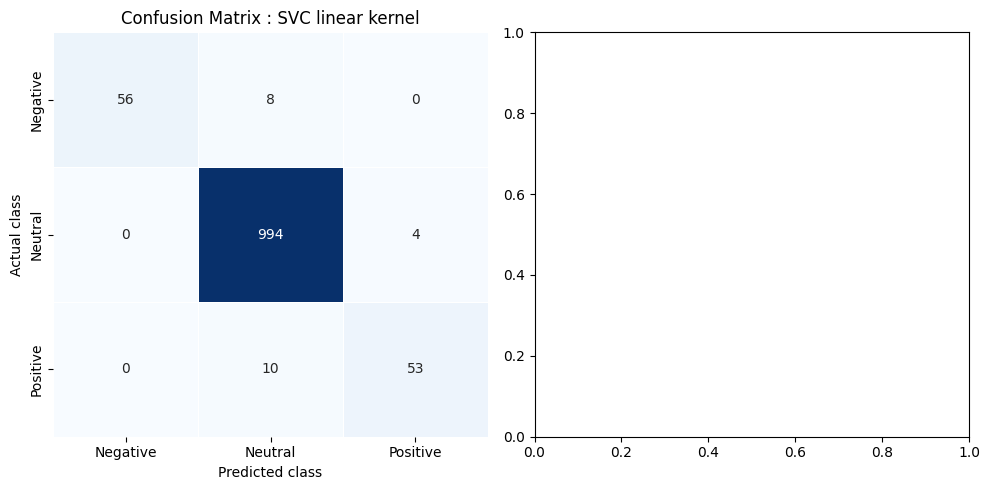

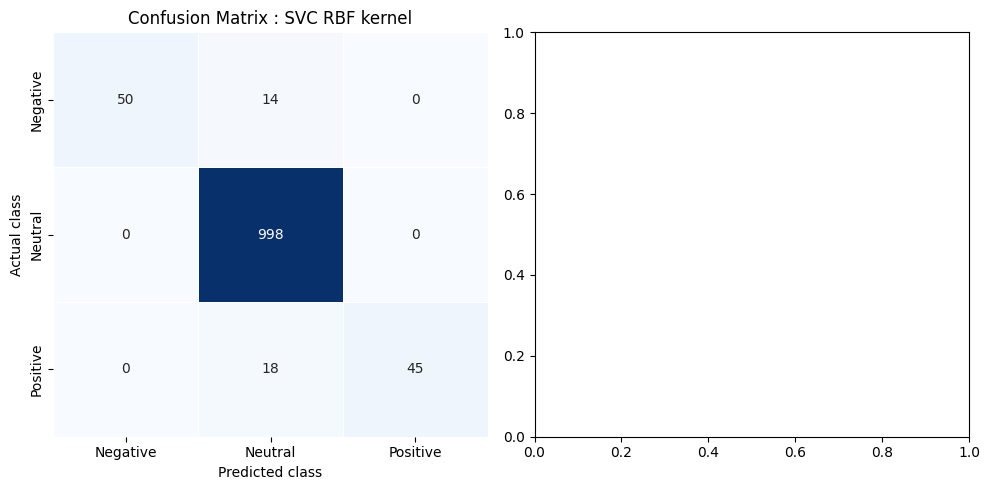

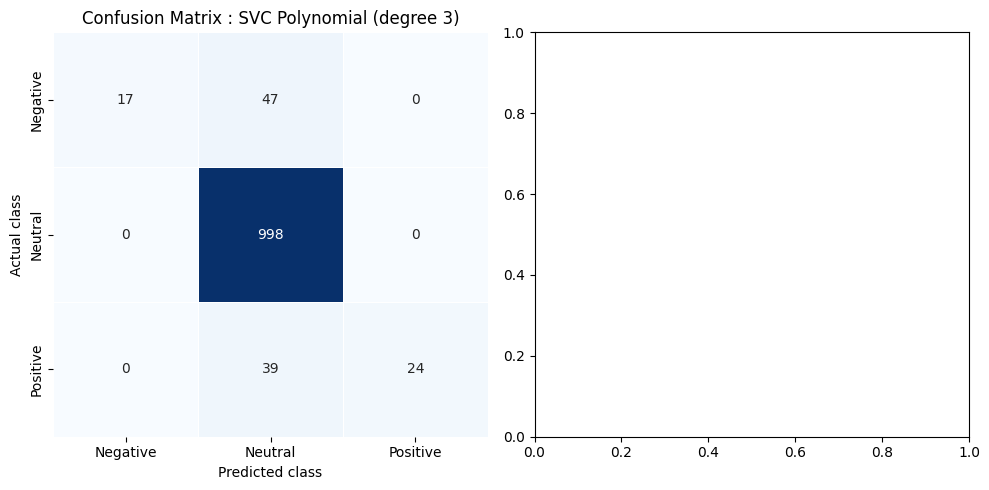

In [160]:
print("[INFO] Laporan klasifikasi\n")
target_names=['Negative', 'Neutral','Positive']
for name, clf in models:
  clf_predict = clf.predict(X_test) #y_pred
  printed_titles=('Menggunakan Metode :{} \n'.format(name))
  printed=(classification_report(y_test, clf_predict, target_names=['Negative', 'Neutral','Positive']))
  akurasi=('Accuracy score: %.2f%%' %(accuracy_score(y_test, clf_predict)*100))  
  presisi=('Precision score: %.2f%%' % (precision_score(y_test, clf_predict, average= 'weighted')*100))
  recall=('Recall score: %.2f%% \n' % (recall_score(y_test, clf_predict, average= 'weighted')*100))
  
  with open('hasil/classification_report_pilpres2024_'+str(jsampling)+'_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
      # f.writelines(''.join(name))
      f.writelines(''.join(printed_titles))
      f.writelines(''.join(printed))
      f.writelines(' \n')
      f.writelines(''.join(akurasi+'\n'+presisi+'\n'+recall))

      f.writelines(' \n')
  print(printed_titles+'\n'+printed)
  print(akurasi+'\n'+presisi+'\n'+recall)
  # Confusion Matrix Plot
  fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
  cm = confusion_matrix(y_test, clf_predict, labels=['Negative', 'Neutral','Positive'])
  sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
  ax1.set_title("Confusion Matrix : {}".format(name))
  ax1.set_xlabel("Predicted class")
  ax1.set_ylabel("Actual class")
  ax1.set_xticklabels(target_names)
  ax1.set_yticklabels(target_names)
  fig.tight_layout()
  plt.savefig('hasil/5.confusion_matrix_'+str(jsampling)+'_{}.png'.format(name))


## Parameter Optimization RandomizedSearchCV / GridSearchCV

In [165]:
cv = StratifiedKFold(n_splits= 3, shuffle = True, random_state= 123)
# Randomized grid search
n_iter_search = 10
param_grid = {'gamma': np.logspace(-2, 2, 5),
              'C': np.logspace(-2, 2, 5)}
gs = RandomizedSearchCV(clf, param_distributions = param_grid, n_iter = n_iter_search, cv = cv, scoring= 'accuracy')
# gs = GridSearchCV(clf, param_grid=param_grid,refit = True, verbose = 3,scoring='accuracy',n_jobs=-1)
# -----------------------------------------------------
# Train model
gs.fit(X_train, y_train)  
best=("The best parameters are %s" % (gs.best_params_)) 
# Predict on test set
y_pred = gs.best_estimator_.predict(X_test)

#Setup GridSearchCV
# grid = GridSearchCV(pipe, param_grid=param_grid,refit = True, verbose = 3,scoring='accuracy',n_jobs=-1)
# grid.fit(X_train, y_train)
# y_pred = grid.predict(X_test)

# Get Probability estimates
# y_prob = gs.best_estimator_.predict_proba(X_test)[:, 1]
# -----------------------------------------------------
akurasi=('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_pred)*100))  
presisi=('Precision score: %.2f%%' % (precision_score(y_test, y_pred, average= 'weighted')*100))
recall=('Recall score: %.2f%%' % (recall_score(y_test, y_pred, average= 'weighted')*100))
with open('hasil/parameter_optimization_report_pilpres2024_'+str(jsampling)+'_'+str(dtuji)+'_'+str(d)+'.txt', 'a', encoding='utf-8') as f:
    # f.writelines(''.join(name))
    f.writelines(''.join('Parameter Optimization'))
    f.writelines(''.join(best))
    f.writelines(' \n')
    f.writelines(''.join(y_pred))
    f.writelines(' \n')
    f.writelines(''.join(akurasi+'\n'+presisi+'\n'+recall))
    f.writelines(' \n')

print(best+'\n'+y_pred+'\n'+akurasi+'\n'+presisi+'\n'+recall)

KeyboardInterrupt: 

ValueError: Found input variables with inconsistent numbers of samples: [1125, 203]

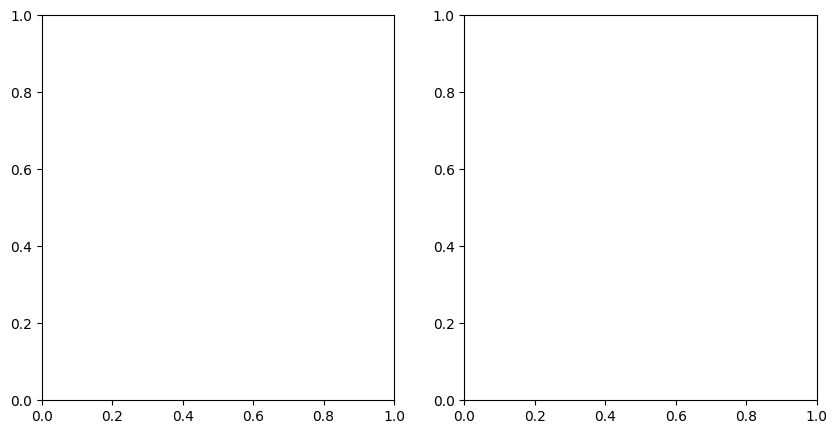

In [164]:
target_label=['Positive','Neutral','Negative']
# Plot confusion matrix
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
cm = confusion_matrix(y_test, y_pred)#, labels= target_label)
sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted class")
ax1.set_ylabel("Actual class")
ax1.set_xticklabels(target_label)
ax1.set_yticklabels(target_label)
fig.tight_layout()
plt.savefig('hasil/5.confusion_matrix_optimization_parameter'+str(jsampling)+'_.png')


## AUROC dan AUC